In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("C:\\Users\\Anish\\Downloads\\Telco_Customer_Churn_Dataset .csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#1. Segment customers based on tenure, monthly charges, and contract type.
#Preprocessing
data = data[['tenure', 'MonthlyCharges', 'Contract', 'Churn']]
data.dropna(inplace=True)

C:\Users\Anish\AppData\Local\Temp\ipykernel_19304\2000788926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [22]:
data.head()

,tenure,MonthlyCharges,Contract,Churn,ChurnFlag,Segment,PCA1,PCA2
0,1,29.85,0,No,0,2,-1.685832,-0.906698
1,34,56.95,1,No,0,0,0.249687,-0.364327
2,2,53.85,0,Yes,1,2,-1.510061,-0.156058
3,45,42.30,1,No,0,0,0.481088,-0.785064
4,2,70.70,0,Yes,1,1,-1.407135,0.368689


In [23]:
data.tail()

,tenure,MonthlyCharges,Contract,Churn,ChurnFlag,Segment,PCA1,PCA2
7038,24,84.80,1,No,0,1,0.128088,0.470714
7039,72,103.20,1,No,0,3,1.640720,1.198626
7040,11,29.60,0,No,0,2,-1.395643,-0.882214
7041,4,74.40,0,Yes,1,1,-1.326191,0.490369
7042,66,105.65,2,No,0,3,2.287975,0.847489


In [15]:
data.columns

Index(['tenure', 'MonthlyCharges', 'Contract', 'Churn', 'ChurnFlag', 'Segment',
       'PCA1', 'PCA2'],
      dtype='object')

In [19]:
data.dtypes

tenure              int64
MonthlyCharges    float64
Contract            int64
Churn              object
ChurnFlag           int64
Segment             int32
PCA1              float64
PCA2              float64
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   Contract        7043 non-null   int64  
 3   Churn           7043 non-null   object 
 4   ChurnFlag       7043 non-null   int64  
 5   Segment         7043 non-null   int32  
 6   PCA1            7043 non-null   float64
 7   PCA2            7043 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 412.8+ KB


In [6]:
# Encode 'Contract' column
data['Contract'] = data['Contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

C:\Users\Anish\AppData\Local\Temp\ipykernel_19304\4071508472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Contract'] = data['Contract'].map({


In [7]:
# Encode 'Churn' for later analysis
data['ChurnFlag'] = data['Churn'].map({'No': 0, 'Yes': 1})

# Feature scaling
features = data[['tenure', 'MonthlyCharges', 'Contract']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


C:\Users\Anish\AppData\Local\Temp\ipykernel_19304\903060329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ChurnFlag'] = data['Churn'].map({'No': 0, 'Yes': 1})


In [21]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_features)


C:\Users\Anish\AppData\Local\Temp\ipykernel_19304\382512301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Segment'] = kmeans.fit_predict(scaled_features)


In [10]:
# 2. Analyze churn rate across these segments
churn_by_segment = data.groupby('Segment')['ChurnFlag'].mean().reset_index()
churn_by_segment.columns = ['Segment', 'ChurnRate']

C:\Users\Anish\AppData\Local\Temp\ipykernel_19304\1714084476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='ChurnRate', data=churn_by_segment, palette='viridis')


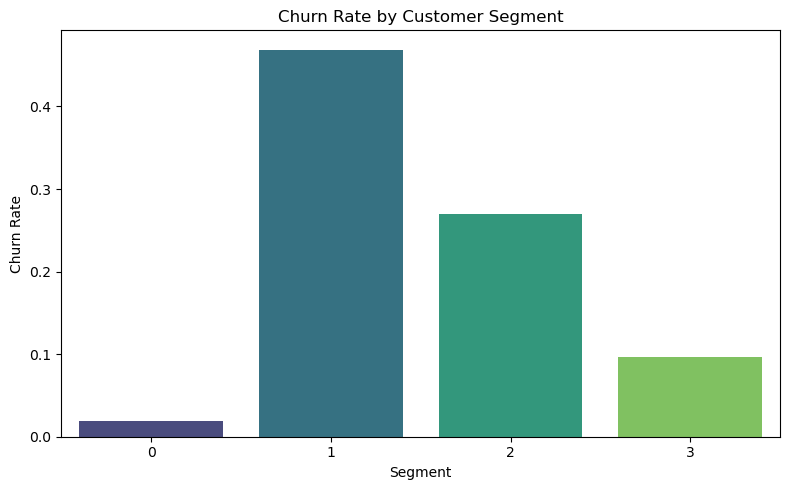

In [11]:
# Visualize the churn rate
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='ChurnRate', data=churn_by_segment, palette='viridis')
plt.title("Churn Rate by Customer Segment")
plt.ylabel("Churn Rate")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()

C:\Users\Anish\AppData\Local\Temp\ipykernel_19304\3813448413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PCA1'] = pca_features[:, 0]
C:\Users\Anish\AppData\Local\Temp\ipykernel_19304\3813448413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PCA2'] = pca_features[:, 1]


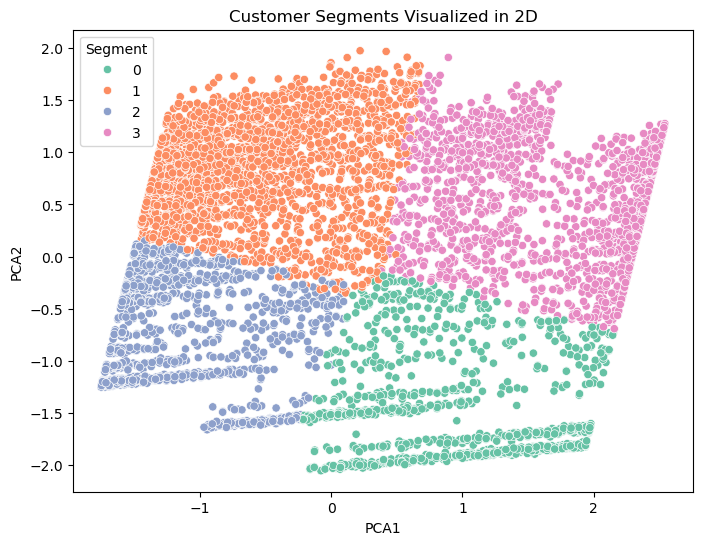

In [14]:
#Visualize the clusters in 2D (using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
data['PCA1'] = pca_features[:, 0]
data['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Segment', palette='Set2')
plt.title("Customer Segments Visualized in 2D")
plt.show()